# Seqeunce Models Specialization with Andrew Ng

This course is notes of **Sequence Models** created by [Andrew Ng](https://www.andrewng.org/).

Youtube Link: [https://www.youtube.com/watch?v=-YuFMqy2Fq8](https://www.youtube.com/watch?v=-YuFMqy2Fq8)

## 1. Why Sequence Models ?

### Can we use MLP for sequence Data?

The vanilla Neural Networks, also known as **Multiple Layer Perceptron**, assume that inputs are independent of each other, meaning they do not share information between training examples. This assumption works well for data with this property. However, for **sequence data** like speech or text, MLPs may not model this type of data effectively. MLPs have several weaknesses in this context:

- Inputs and outputs can have different lengths in different training examples.
- MLPs do not share features learned across different positions in the sequence.



<center>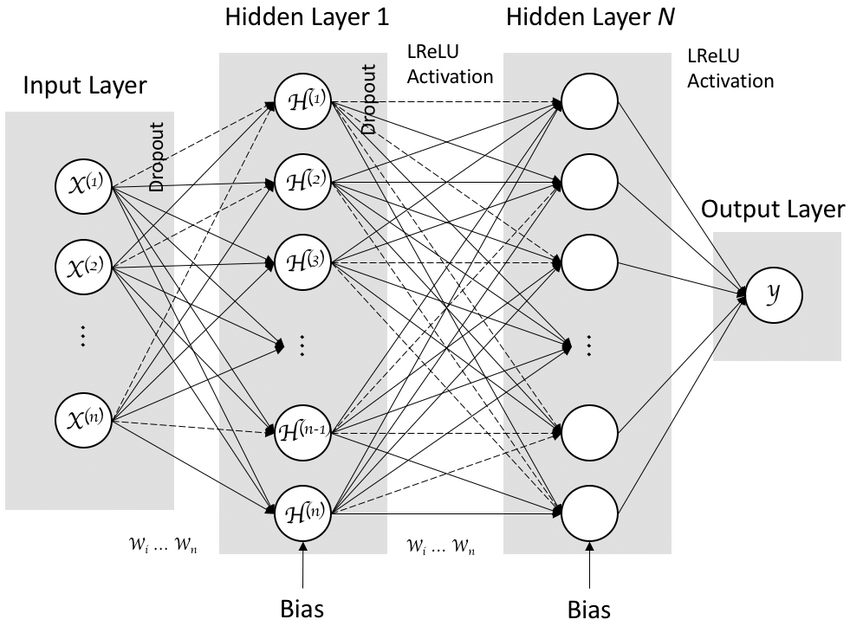

### Example of Sequence Data

- **Speech recognition:** <center>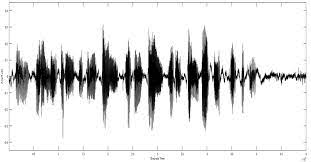

- **Text -> Sentiment classification:** <center>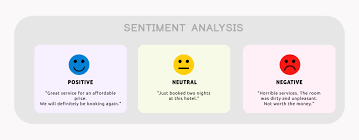

- **DNA sequence analysis** <center>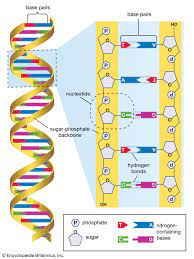

### Notations

In this section, we will discuss the notations that we will use throughout this course. Let's consider $x$ to be a sequence:

$$
x: \text{Harry Potter and Hermione Granger invented a new spell}
$$

where each word in the sequence corresponds to a position $t$:

$$
\text{Harry} \rightarrow x^{<1>}
$$

$$
\text{Potter} \rightarrow x^{<2>}
$$

$$
\vdots
$$

$$
\text{spell} \rightarrow x^{<T_x>}
$$


So, we can map the $i$-th word with $x^{<i>} \mid i \in \{1, \cdots, T_x \}$ vector. For label, as well we can map the $j$-th label with encoded label $y^{<j>} \mid j \in \{1, \cdots, T_y\}$

Let $X$ be a training matrix of size $m \times n$, where $m$ is the number of training examples, and $n$ represents the number of tokens (words) within each sequence. Therefore, 

$$
X^{(i)<t>} \text{ represents the $t$-th token in the $i$-th sequence in the matrix } X.
$$

The same notation applies for $Y^{(i)<t>}$, which represents the label for each training example.


## 2. Recurrent Neural Networks Models

We have seen in previous sections that standard neural network architecture comes with several issues when dealing with sequence data. The **Recurrent Neural Network** (or **RNN**) architecture is proposed to solve these problems. The architecture is illustrated in the following figure:


<center>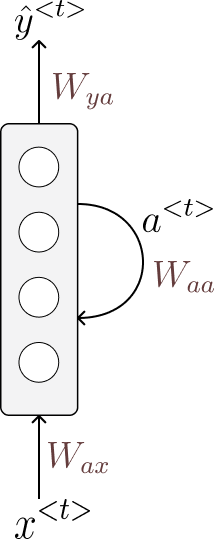

<div class="admonition info" markdown>
    <p class="admonition-title">Note</p>
        <p> 
            One weakness of <b>RNN</b>, we use only the previous information to make predictions, other architecture are proposed to deal with this issue, ex. the <b>BRNN</b> stands for <b>Bidirectional RNN</b>. 
        </p>
    </p>
</div>

### Forward Propagation

Let's define each term in this recurrent architecture. We start with the initial condition: $a^{<0>} = \vec{0}$. For each time step $t$ from 1 to $T_x = T_y$, we have:

$$
a^{<t>} = g \left( W_{aa}a^{<t-1>} + W_{ax}x^{<t>} + b_a \right)
$$

Here, $x^{<t>}$ is the input, and $a^{<t-1>} \mid_{t=1} = \vec{0}$. The parameters $W_{aa}$, $W_{ax}$, and $b_a$ are learnable and updated during back-propagation. To compute the predicted $y^{<t>}$, we use:

$$
y^{<t>} = h(W_{ya}a^{<t>} + b_y)
$$

Here, $W_{ya}$ and $b_y$ are learnable parameters, and $a^{<t>}$ is the result of the previous expression. The $g$, $h$ are the activation functions, in practice $g$ is often $tanh$, in other hand the $h$ depends on the task, in classification tasks $\sigma$ (sigmoid) may be used.


Let's now simplify the expressions a lettle bit, we can put : 

$$ W_a = \begin{bmatrix}
            W_{aa} & W_{ax} \\
        \end{bmatrix} \text{ and }W_{y} = W_{ya}
$$

so, the previous equations become: 

$$
a^{<t>} = g \left( W_a[a^{<t-1>}, x^{<t>}] + b_a \right)
$$

$$
y^{<t>} = h(W_ya^{<t>} + b_y)
$$


### RNN Architectures

The Recurrent neural networks (RNNs) are flexible in their design and can be adapted to various tasks. This figure illustrates some possible RNN architectures and their corresponding applications: 

<center>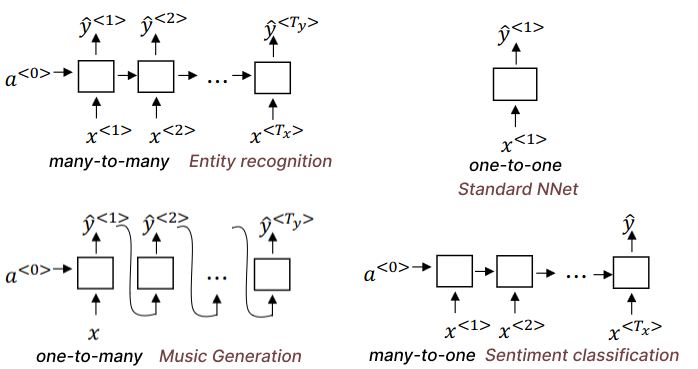

The key thing to remember with RNNs is the difference between the number of inputs $T_x$ and the number of outputs $T_y$. As you'll see, in most RNN architectures, these lengths can be different $T_x \ne T_y$.

<center>
    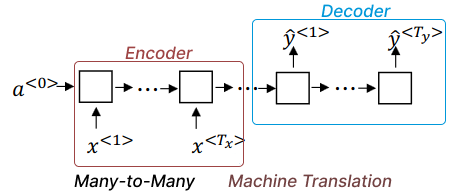
</center>

### Language Models and Sequence Generation

#### What's Language Model (LM)

The **Language Model** is a *probabilistic model*, that assigns probabilities to sequence of words, it's used to estimate the likelihood of a given sequence of tokens (ex. words) occurring in a language. This is typically done by training the model on a large corpus of text (ex. extracted from the net), that try to learn statistical patterns and relationships between different tokens (ex. words).

In a **Speech Recognition** problem where the same sound can be interpreted into multiple words (homophones), language models play a crucial role in determining the most likely interpretation. Consider the example:

- $S_1$: The apple and **pair** salad.
- $S_2$: The apple and **pear** salad.

Both **pair** and **pear** sound the same, but the second sentence is more likely the correct one. A language model assigns probabilities to sentences, which can help in deciding between these interpretations. For example:

$$P(S_1) = 3.2 \times 10^{-13}$$
$$P(S_2) = 5.7 \times 10^{-10}$$

In this case, the higher probability for $S_2$ indicates that it is more likely the correct interpretation. For **pair** word in the $S_1$: 

$$ P(\text{pair}) = P(\text{the})P(\text{apple} \mid \text{the})P(\text{and} \mid \text{the, apple})P(\text{pair} \mid \text{the, apple, and})$$

This formula is optained using the [Law of total probability](https://en.wikipedia.org/wiki/Law_of_total_probability). The following figure illustrates how you can search for $S_1$ on Google and receive suggestions that indicate the second sentence is make more sense.

<center>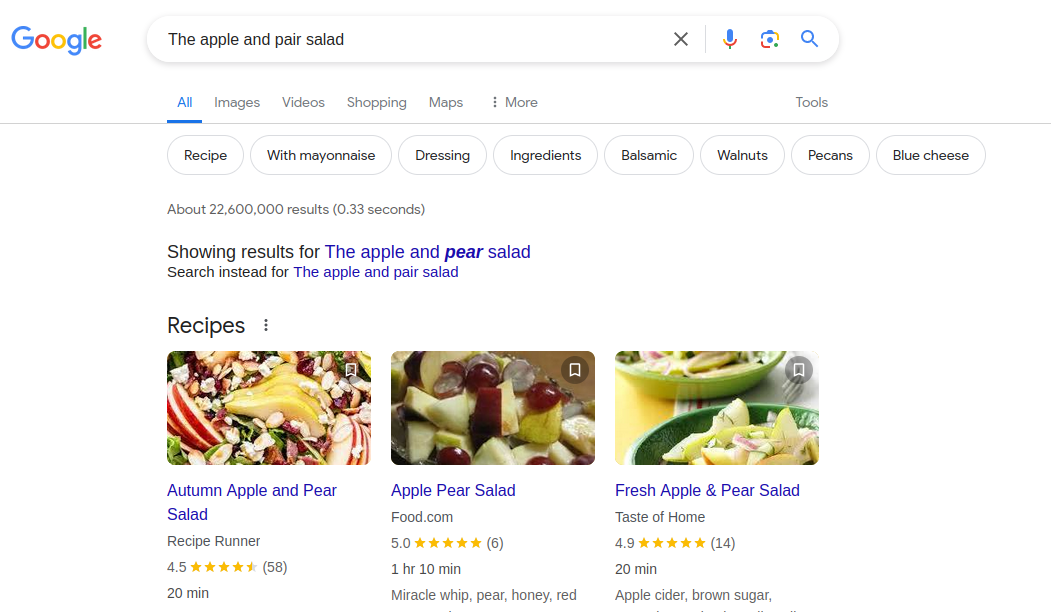</center>

#### How Build a Language Model using RNNs

To build a language model using RNNs, you need to follow several steps:

1. Prepare a large corpus of text, which can be found online (e.g., Wikipedia).
2. Tokenize this text into tokens. Initially, you can use a naive tokenizer, such as splitting based on whitespace or considering each character as a token. In the comming example, we will build a **Character-Level Language Model** in PyTorch trained on [Shakespeare](https://en.wikipedia.org/wiki/William_Shakespeare) text.
3. The training set will have the following property:

$$ X^{<t>} = y^{<t-1>}$$


<center>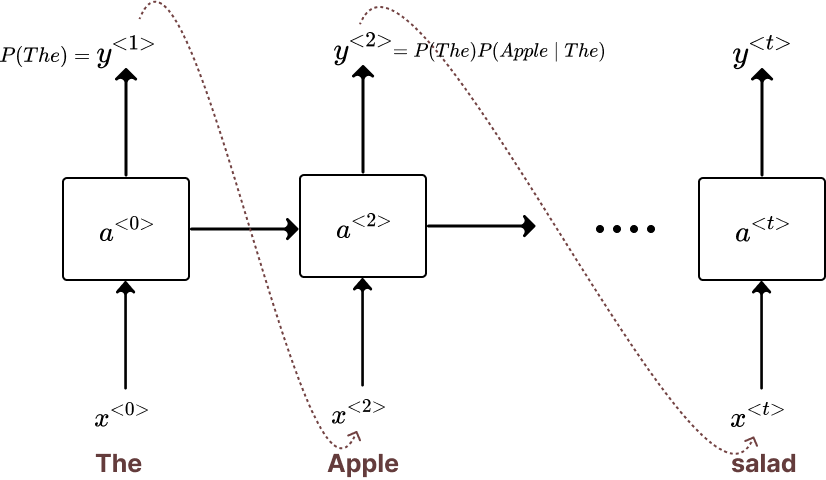</center>

### Character Level Generation with RNNs using PyTorch

In [1]:
# import pytorch libray

import torch, torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

#### Prepare a large corpus Text of ShakeSpeare

For donwloading the file, check the link [shakespeare.txt](https://github.com/JamorMoussa/coursera-deep-learning-specialization/blob/master/C5%20-%20Sequence%20Models/Week%201/Building%20a%20Recurrent%20Neural%20Network%20-%20Step%20by%20Step/shakespeare.txt)

In [2]:
# read the shakespeare's text, and keep only 10000 character

text = open("./shakespeare.txt", "r").read()[:10000]

In [8]:
# print the first 250 characters

print(text[:250])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



As previously mentioned, we need to construct a vocabulary that includes all unique characters found in our text. The vocabulary contains `57` characters.

In [10]:
vocab = sorted(set(text))

In [13]:
print(vocab)

['\n', ' ', '!', "'", ',', '-', '.', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [15]:
# the length of vocabulary:

print(len(vocab))

57


The `encoder` and `decoder` dictionaries are required. The `encoder` indexes the characters with unique IDs, while the `decoder` takes an ID and returns the corresponding character.

In [16]:
encoder = {char:i for i, char in enumerate(vocab)}
decoder = {i:char for i, char in enumerate(vocab)}

In [19]:
print(encoder)

{'\n': 0, ' ': 1, '!': 2, "'": 3, ',': 4, '-': 5, '.': 6, ':': 7, ';': 8, '?': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'H': 16, 'I': 17, 'J': 18, 'L': 19, 'M': 20, 'N': 21, 'O': 22, 'P': 23, 'R': 24, 'S': 25, 'T': 26, 'U': 27, 'V': 28, 'W': 29, 'Y': 30, 'a': 31, 'b': 32, 'c': 33, 'd': 34, 'e': 35, 'f': 36, 'g': 37, 'h': 38, 'i': 39, 'j': 40, 'k': 41, 'l': 42, 'm': 43, 'n': 44, 'o': 45, 'p': 46, 'q': 47, 'r': 48, 's': 49, 't': 50, 'u': 51, 'v': 52, 'w': 53, 'x': 54, 'y': 55, 'z': 56}


In [20]:
print(decoder)

{0: '\n', 1: ' ', 2: '!', 3: "'", 4: ',', 5: '-', 6: '.', 7: ':', 8: ';', 9: '?', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'H', 17: 'I', 18: 'J', 19: 'L', 20: 'M', 21: 'N', 22: 'O', 23: 'P', 24: 'R', 25: 'S', 26: 'T', 27: 'U', 28: 'V', 29: 'W', 30: 'Y', 31: 'a', 32: 'b', 33: 'c', 34: 'd', 35: 'e', 36: 'f', 37: 'g', 38: 'h', 39: 'i', 40: 'j', 41: 'k', 42: 'l', 43: 'm', 44: 'n', 45: 'o', 46: 'p', 47: 'q', 48: 'r', 49: 's', 50: 't', 51: 'u', 52: 'v', 53: 'w', 54: 'x', 55: 'y', 56: 'z'}


#### Prepare the Training set

In [21]:
X = torch.tensor([encoder[char] for char in text[:-1]])

In [22]:
X[:10]

tensor([15, 39, 48, 49, 50,  1, 12, 39, 50, 39])

In [23]:
X.shape

torch.Size([9999])

In [25]:
Y = torch.tensor([encoder[char] for char in text[1:]])

In [27]:
Y[:10]

tensor([39, 48, 49, 50,  1, 12, 39, 50, 39, 56])

In [28]:
# create the dataset using TensorDataset

train_data = TensorDataset(X, Y)

In [30]:
train_data[:4]

(tensor([15, 39, 48, 49]), tensor([39, 48, 49, 50]))

In [31]:
# define a train loader with batch_size 500

train_loader = DataLoader(train_data, batch_size=500)

#### Define The Language Model RNN Architecture

In [32]:
class LM_RNNModel(nn.Module):
    
    vocab_size: int
    emb_size: int = 32
    hidden_size: int = 128
    num_layers: int = 1
    seq_size: int = 1
    
    def __init__(self, vocab_size: int) -> None:
        super(LM_RNNModel, self).__init__()
        self.vocab_size: int = vocab_size
        
        self.emb = nn.Embedding(self.vocab_size, self.emb_size)

        self.rnn = nn.RNN(self.emb_size, self.hidden_size, self.num_layers)


        self.fc = nn.Sequential(
            nn.Linear(self.hidden_size, 64),
            nn.Linear(64, self.vocab_size)
        )
            

    def forward(self, input: torch.tensor, hidden: torch.tensor) -> torch.tensor:
        out = self.emb(input)
        out , hidden = self.rnn(out, hidden)
        return self.fc(out), hidden

In [74]:
# create an instance of LM_RNNModel 

model = LM_RNNModel(vocab_size=len(vocab))

In [75]:
model

LM_RNNModel(
  (emb): Embedding(57, 32)
  (rnn): RNN(32, 128)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=57, bias=True)
  )
)

The `LM_RNNModel` contains three main parts. An `nn.Embedding` layer that map each charater with a vector. Then, a RNN Layer that take two inputs, the character representation and the hidden tensor. Finally, a Full-Connected layer.

In [76]:
# define the hidden tensor:

hidden = torch.randn(model.seq_size, model.hidden_size)

In [77]:
x1, y1 = next(iter(train_loader))

In [78]:
model(x1, hidden)

(tensor([[-7.4695e-02, -1.6429e-01,  1.8381e-02,  ...,  2.6543e-01,
          -1.3445e-04,  3.2170e-01],
         [-9.5370e-02, -6.8306e-03, -1.1801e-01,  ..., -2.9214e-02,
          -9.9421e-02, -1.4067e-01],
         [-2.0766e-02,  6.9504e-02, -1.1826e-01,  ...,  2.5331e-01,
          -1.0180e-01, -7.5558e-02],
         ...,
         [ 7.4759e-03, -9.2480e-02, -1.8126e-01,  ...,  1.4836e-01,
           3.6416e-02, -1.0179e-01],
         [-7.2682e-02, -6.5333e-02, -7.8535e-02,  ...,  1.5850e-01,
          -4.5765e-02, -7.2717e-02],
         [-7.4645e-02, -6.4154e-02, -3.1239e-02,  ...,  2.6167e-01,
          -1.1703e-01, -2.6830e-02]], grad_fn=<AddmmBackward0>),
 tensor([[-0.2144,  0.2201, -0.1213,  0.5824, -0.0648, -0.2723,  0.0505, -0.0239,
           0.1193, -0.3353,  0.0263,  0.1349, -0.3484,  0.1974,  0.6331, -0.1926,
           0.2692, -0.2282, -0.1555, -0.3032, -0.0698, -0.1179,  0.0994, -0.0680,
          -0.2117, -0.3542,  0.3325,  0.2934, -0.1904, -0.0686, -0.1570, -0.4542,


Let's define a `generate` function that take the model as parameter and try to generate sequence of charaters

In [79]:
def generate(model=model, start_char: str = "a", max_token: int = 30) -> None:
    hidden = torch.randn(model.seq_size, model.hidden_size)

    char = start_char

    print(char, end="")
    
    for t in range(max_token):

        input = torch.tensor(encoder[char]).view(-1)
        
        out, hidden = model(input, hidden)

        next_index = int(out.argmax())

        char = decoder[next_index]

        print(char, end="")

Let's generate ten charaters, which start with **`h`**: 

In [80]:
generate(model, start_char="h", max_token=10)

hfhteof?LPx

The output doesn't make sense, right ? this model is not tranined yet, wait until the end 😊. 

In [81]:
# define the cross entropy loss (mutli-classe task)

criterion = nn.CrossEntropyLoss()

In [82]:
# define AdamW optimizer with lr=0.01

opt = optim.AdamW(model.parameters(), lr = 0.001)

#### Time to Train 😊

In [83]:
def train(epochs: int = 100): 
    hidden = torch.randn(model.seq_size, model.hidden_size)
    
    for epoch in range(epochs):
        
        for i, (inputs, labels) in enumerate(train_loader):
        
            opt.zero_grad()

            hidden = hidden.detach()
            
            labels_pred, hidden = model(inputs, hidden)
        
            loss = criterion(labels_pred, labels)
            
            loss.backward()
            
            opt.step()
    
        if epoch%10==0 or epoch==0:
            print(f"Epochs: {epoch:4d} | Iteration: {i:4d}| Loss: {loss.item():4.7f}")
            print("-"*80)
                

In [84]:
train()

Epochs:    0 | Iteration:   19| Loss: 3.2646050
--------------------------------------------------------------------------------
Epochs:   10 | Iteration:   19| Loss: 2.2732933
--------------------------------------------------------------------------------
Epochs:   20 | Iteration:   19| Loss: 1.9699154
--------------------------------------------------------------------------------
Epochs:   30 | Iteration:   19| Loss: 1.7258064
--------------------------------------------------------------------------------
Epochs:   40 | Iteration:   19| Loss: 1.5044402
--------------------------------------------------------------------------------
Epochs:   50 | Iteration:   19| Loss: 1.2867706
--------------------------------------------------------------------------------
Epochs:   60 | Iteration:   19| Loss: 1.1347806
--------------------------------------------------------------------------------
Epochs:   70 | Iteration:   19| Loss: 0.9803897
-------------------------------------------------

After the `LM_RNNModel` model is trained, let's generate some ShakeSpeare style 😃 😅.

In [85]:
generate(model, start_char="h", max_token=1000)

hen toud course tort as make it, en thuth are from they were are all in counde though sends you think wele, thing lation, will feriming tur ourt, the are and if they wall one acun to the sences his first the ristrongest thich are this deart will flatter
Unto the anowe
As, ling tour soffor us not undo food
'ffmous,
Or this forthith,
Wiet what to fines from thes way thing link noth o't make it, en thuth are from they were are all in counde though sends you think wele, thing lation, will feriming tur ourt, the are and if they wall one acun to the sences his first the ristrongest thich are this deart will flatter
Unto the anowe
As, ling tour soffor us not undo food
'ffmous,
Or this forthith,
Wiet what to fines from thes way thing link noth o't make it, en thuth are from they were are all in counde though sends you think wele, thing lation, will feriming tur ourt, the are and if they wall one acun to the sences his first the ristrongest thich are this deart will flatter
Unto the anowe
As, l

### Vanishing Gadients With RNNs

The **Vanishing Gradients problem** occurs when gradients become extremely small as they are backpropagated through the layers of a deep neural network during training. This the biggest problem of basic RNNs.

Let's take an example. Suppose we are working with language modeling problem and there are two sequences that model tries to learn:

- The **cat**, which already ate ..., **was** full.
- The **cats**, which already ate ..., **were** full.

What we need to learn here that **was** came with **cat** and that **were** came with **cats**. The naive RNN is not very good at capturing very **long-term dependencies** like this. So, architectures like **LSTM (Long Short Term Memory)** and **GRU(Gated Recurrent Unit)** are proposed to solve this issue.

## References

- **The Unreasonable Effectiveness of Recurrent Neural Networks** [http://karpathy.github.io/2015/05/21/rnn-effectiveness/](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)
- Other Notes for this course : [coursera deep learning specialization sequence models](https://github.com/JamorMoussa/coursera-deep-learning-specialization/tree/master/C5%20-%20Sequence%20Models/Notes#vanishing-gradients-with-rnns)